# Modelo con distribución aleatoria con 25% de Pt
## Empezamos por hacer nuestro shell
Creamos nuestro Shell FCC de 10 capas, distancia interatómica de 2.78 Angstroms y hacemos un radcut de 15 A, y de igual manera lo visualizamos con jmol

In [55]:
from sys import path
import os
dir_actual = os.getcwd()
path.insert(0, 'C:/Users/guill/OneDrive/Documentos/Tesis/Proyect')

import myfuncions.core_shell_f as cs
import myfuncions.randomize_f as ranf
import myfuncions.tools_f as tools
import subprocess as sbp

coords = cs.cubeShell(10,2.775,'fcc')
coords = cs.sphericalShave(coords,15)
atpos, eleList = cs.atpos_eleList_maker(coords,'Ni')
atpos, eleList, mode = ranf.cambiar_elementos_prob(atpos,{"Pt":0.25,"Ni":0.75})
tools.show_percent(atpos,eleList)

name='Pt-0.25-radrand.xyz'
tools.wXYZ(atpos,name)

sbp.run(['java', '-jar', 'C:\\Users\\guill\\Downloads\\Jmol-16.1.41-binary\\jmol-16.1.41\\Jmol.jar', name])

Cambia elementos prob a atpos
atomos totales : 959
Ni : 74.13972888425444 %, 711
Pt : 25.86027111574557 %, 248


CompletedProcess(args=['java', '-jar', 'C:\\Users\\guill\\Downloads\\Jmol-16.1.41-binary\\jmol-16.1.41\\Jmol.jar', 'Pt-0.25-radrand.xyz'], returncode=0)

Aquí lo obtenido:
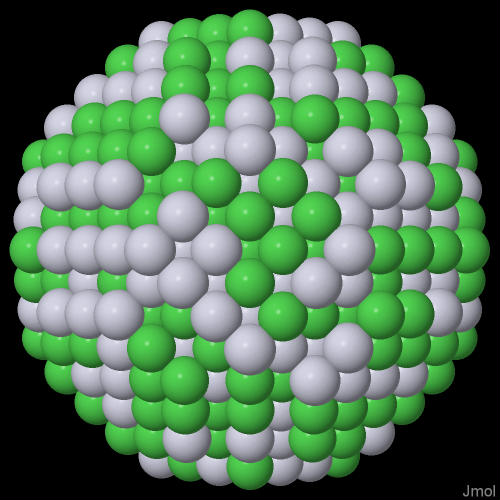

## Trabajaremos con lammpin

In [56]:
from myfuncions.lammpin_f import wlammpin

wlammpin(atpos,eleList,name)

Pt-0.25-radrand.ini


## Dinámica Molecular empieza aquí
Si la proxima linea de comandos se cierra repentinamente es necesario checar el .ini que tenga la cantidad de átomos que debe de ser
El powershell se cierra despues de 10 s

In [57]:

input = f"""
# 2NN EAM potential in LAMMPS

 units		metal
 atom_style	atomic
 boundary	f f f

 read_data	{name[:-4]}.ini
 pair_style	meam
 pair_coeff	* * ..\\..\\LAMMPS\\library.meam Pt Ni ..\\..\\LAMMPS\\PtNiV2.pot Pt Ni 
 
 neighbor	0.5 bin
 neigh_modify	every 1 delay 0 check yes once no
 velocity	all create 0.00 13478 rot yes mom yes dist gaussian
 timestep	0.005

 fix            1 all nve
 fix            2 all temp/rescale 10 0.00 0.00 1.0 1
 thermo         100
 thermo_style   custom step temp atoms pe ke etotal
 thermo_modify  lost ignore
 run 600

 unfix 2
 fix         3 all temp/berendsen 0.0 300.0 0.1
 thermo		100
 run		9000

 unfix 3
 timestep   0.001
 thermo		100
 fix		4 all langevin 300.0 300.0 0.5 87654
 dump           4 all xyz 100 {name[:-4]}_d.xyz
 run		1000
"""
with open('input.in','w') as archivo:
    archivo.write(input)

os.system('start powershell -Command lmp -in input.in; Start-Sleep -s 20; exit')

0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


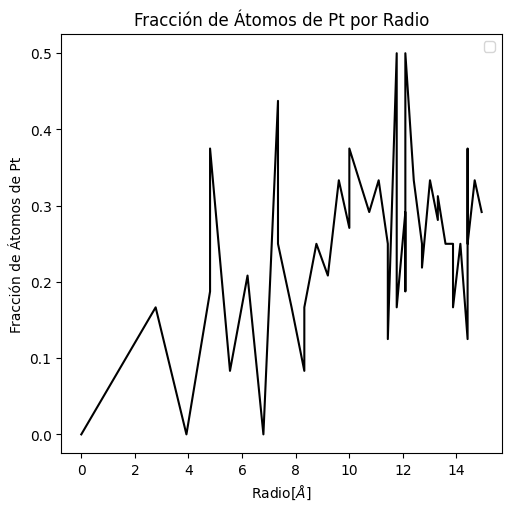

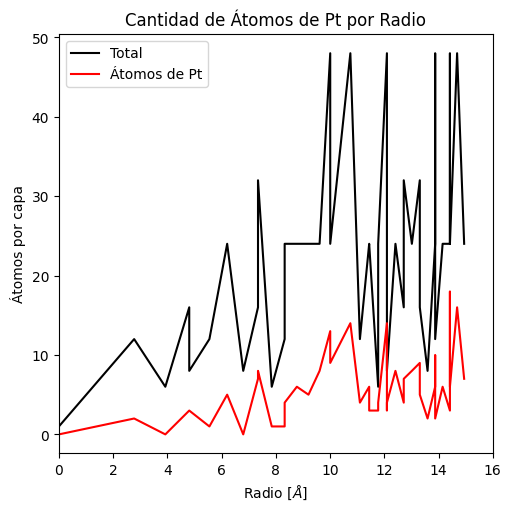

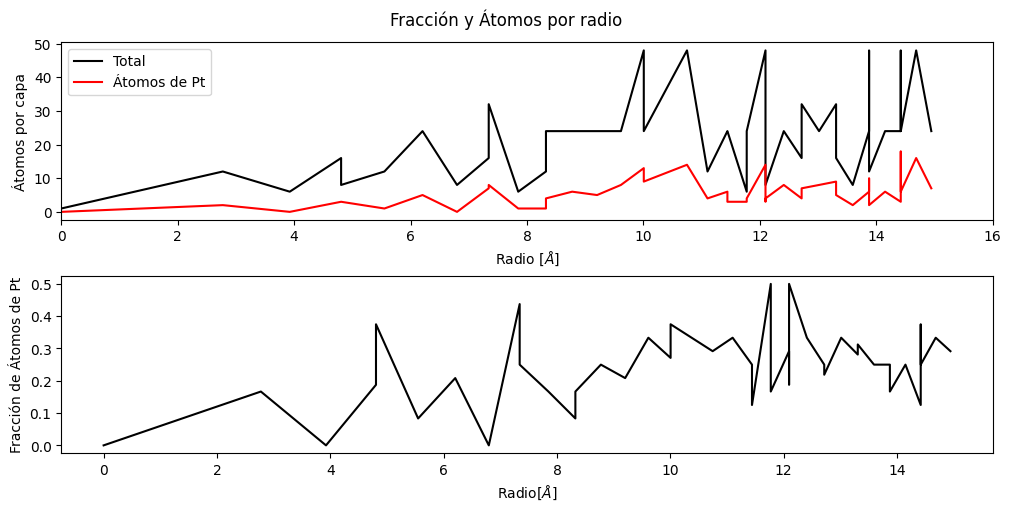

In [58]:
import myfuncions.graphs_f as plt


gatpos, geleList = plt.leer_xyz(f'{name[:-4]}.xyz')
plt.graficar_fracc_at_p_rad(gatpos,'Pt')
plt.graficar_at_p_rad(gatpos,'Pt')
plt.plot_fracc_y_at_p_rad(gatpos,'Pt')

### A trabajar con el dump
ahora estaremos trabajando con el dump, cambiando etiquetas y mostrandolo de nuevo

In [59]:
import myfuncions.tools_f as tools

dumpatpos, dumpeleList = tools.leer_xyz(f'{name[:-4]}_d.xyz')
dumpatpos, dumpeleList = tools.cambiar_etiquetas_xyz(dumpatpos,dumpeleList,{1: 'Ni', 2: 'Pt'})
tools.wXYZ(dumpatpos,f'{name[:-4]}_d.xyz')

sbp.run(['java', '-jar', 'C:\\Users\\guill\\Downloads\\Jmol-16.1.41-binary\\jmol-16.1.41\\Jmol.jar', f'{name[:-4]}_d.xyz'])

Cambia etiquetas a "atpos"


CompletedProcess(args=['java', '-jar', 'C:\\Users\\guill\\Downloads\\Jmol-16.1.41-binary\\jmol-16.1.41\\Jmol.jar', 'Pt-0.25-radrand_d.xyz'], returncode=0)

Este es el dump:
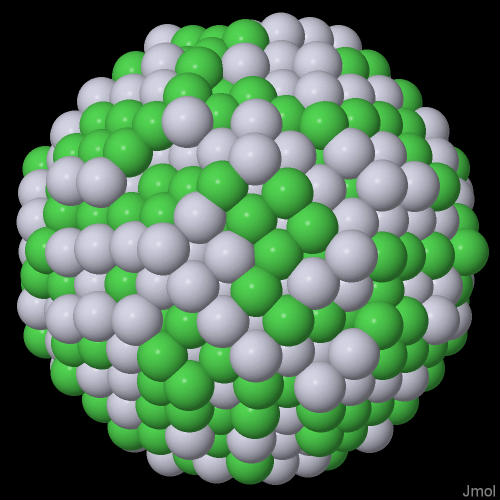

## Ahora haremos los gráficos y el análisis 

Grafico de distribuciones

## Aquí se hace el PDF y la gráfica
oquettrnr

el proximo código arregla el problema de path

In [1]:
#from sys import path
#import os
#dir_actual = os.getcwd()
#path.insert(0, 'C:/Users/guill/OneDrive/Documentos/Tesis/Proyect')

In [11]:
import PDF.runner as pdf
#name = 'ejem1.xyz'
pdf.run_pdf(f'{name[:-4]}_d.xyz', dir_actual, 1600,0.02)

c:\Users\guill\OneDrive\Documentos\Tesis\Proyect\15_de_marzo\Pt_25_rand

 El tamaño del sistema supera los parametros    35.4771957      >    32.0000000    
 El tamaño del sistema supera los parametros    32.4016914      >    32.0000000    
 El tamaño del sistema supera los parametros    33.7086029      >    32.0000000    
 El tamaño del sistema supera los parametros    33.2244377      >    32.0000000    
 El tamaño del sistema supera los parametros    32.1685867      >    32.0000000    
 El tamaño del sistema supera los parametros    34.7544746      >    32.0000000    
 El tamaño del sistema supera los parametros    35.7716331      >    32.0000000    
 El tamaño del sistema supera los parametros    41.2141457      >    32.0000000    
 El tamaño del sistema supera los parametros    33.3732376      >    32.0000000    
 El tamaño del sistema supera los parametros    37.0161514      >    32.0000000    
 El tamaño del sistema supera los parametros    35.4985924      >    32.0000000    
 El

In [1]:
name = 'Pt-0.25-radrand.xyz'

Hacemos la gráfica PDF

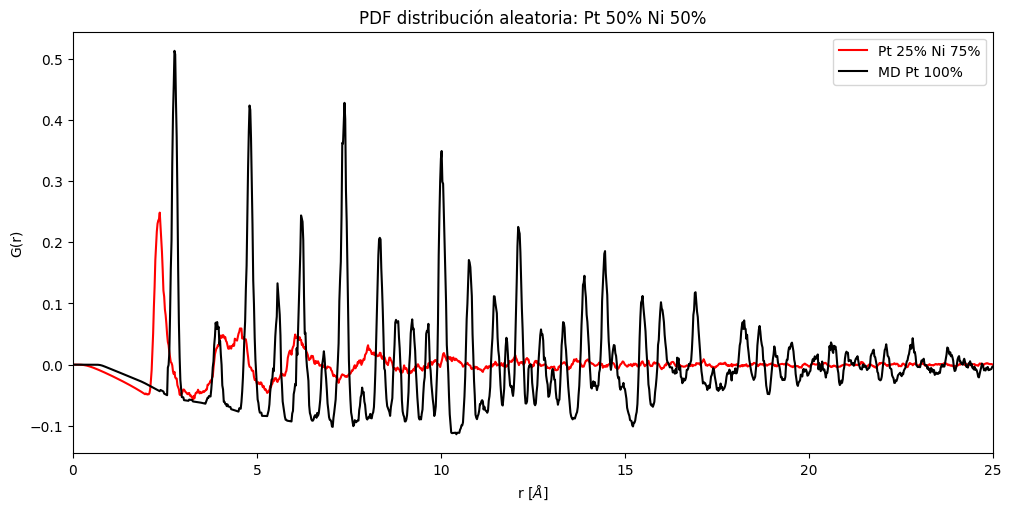

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


df_FCC= pd.read_csv(f'{name[:-4]}_d.txt', sep='\s+')
df_ref = pd.read_csv('C:/Users/guill/OneDrive/Documentos/Tesis/Proyect/15_de_marzo/Pt_100/Pt-FCC_d.txt', sep = '\s+')


fig, ax =plt.subplots(figsize=(10,5), layout='constrained')
ax.plot(df_FCC['#r(A)'], df_FCC['G(r)'], label='Pt 25% Ni 75%', color = 'red')
ax.plot(df_ref['#r(A)'],df_ref['G(r)'], label = 'MD Pt 100%', color = 'black')


ax.set_xlabel('r [$\\AA$]')
ax.set_xlim([0,25])
ax.set_ylabel('G(r)')
ax.set_title('PDF distribución aleatoria: Pt 50% Ni 50%')
#ax.grid('True', linestyle='-')
ax.legend()
plt.show()

Ahora comparamos con uno de Niquel 100% con MD

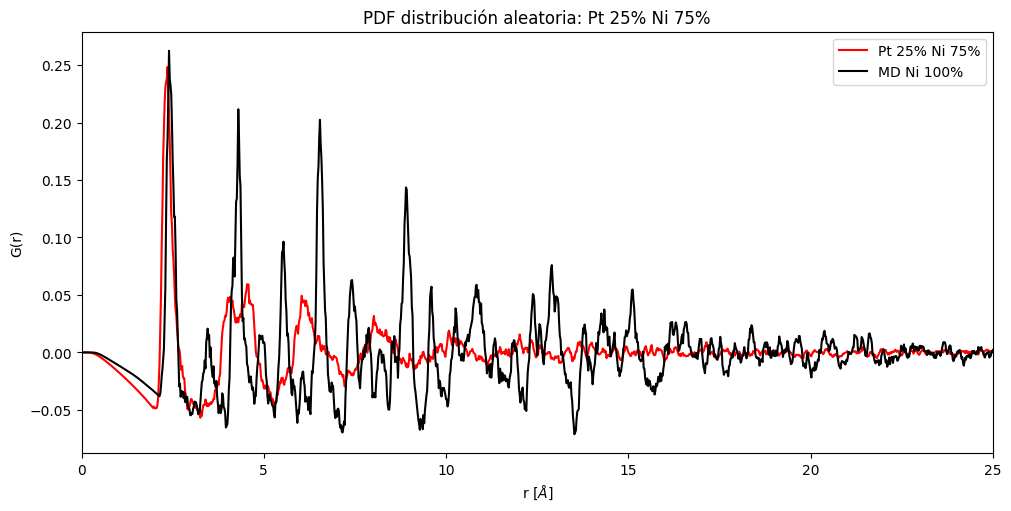

In [5]:
df_FCC= pd.read_csv(f'{name[:-4]}_d.txt', sep='\s+')
df_ref = pd.read_csv('C:\\Users\\guill\\OneDrive\\Documentos\\Tesis\\Proyect\\15_de_marzo\\Ni_100\\Ni-FCC_d.txt', sep = '\s+')


fig, ax =plt.subplots(figsize=(10,5), layout='constrained')
ax.plot(df_FCC['#r(A)'], df_FCC['G(r)'], label='Pt 25% Ni 75%', color = 'red')
ax.plot(df_ref['#r(A)'],df_ref['G(r)'], label = 'MD Ni 100%', color = 'black')


ax.set_xlabel('r [$\\AA$]')
ax.set_xlim([0,25])
ax.set_ylabel('G(r)')
ax.set_title('PDF distribución aleatoria: Pt 25% Ni 75%')
#ax.grid('True', linestyle='-')
ax.legend()
plt.show()